<a href="https://colab.research.google.com/github/sarahmohamed98/SIR-Tool/blob/main/Tuve_synthetic_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import drive
#mount
drive.mount('/content/drive')
eligibility=pd.read_csv('/content/drive/MyDrive/eligibility.csv')
pharmacy=pd.read_csv('/content/drive/MyDrive/pharmcy.csv')
medical=pd.read_csv('/content/drive/MyDrive/medical_claim.csv')
eligibility3=pd.read_csv('/content/drive/MyDrive/eligibility3.csv')

Mounted at /content/drive


<ipython-input-1-d3634af8add8>:7: DtypeWarning: Columns (9,10,11,12,13,17,25,26,48,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,101,116,117,118,119,120,121,122,123,126) have mixed types. Specify dtype option on import or set low_memory=False.
  medical=pd.read_csv('/content/drive/MyDrive/medical_claim.csv')


summary stat


In [2]:
import pandas as pd

# Assuming your DataFrame is named 'eligibility'

# List of specified categorical columns
categorical_columns = [
    'PATIENT_ID', 'MEMBER_ID', 'GENDER', 'RACE', 'BIRTH_DATE', 'DEATH_DATE',
    'ENROLLMENT_START_DATE', 'ENROLLMENT_END_DATE', 'PAYER', 'PAYER_TYPE',
    'PLAN', 'STATE', 'DEATH_FLAG', 'ORIGINAL_REASON_ENTITLEMENT_CODE',
    'DUAL_STATUS_CODE', 'MEDICARE_STATUS_CODE'
]

# Create a DataFrame to store summary statistics
summary_stats = pd.DataFrame(index=categorical_columns)

# Count (number of unique values)
summary_stats['Count'] = eligibility[categorical_columns].nunique()

# Mode (most frequent value)
summary_stats['Mode'] = eligibility[categorical_columns].mode().iloc[0]

# Percentage of missing values (if any)
summary_stats['Percentage Missing'] = eligibility[categorical_columns].isnull().mean() * 100

# Display the summary statistics
print(summary_stats)


                                  Count        Mode  Percentage Missing
PATIENT_ID                         1000       10750            0.000000
MEMBER_ID                          1000       10750            0.000000
GENDER                                2      female            0.000000
RACE                                  7       white            0.000000
BIRTH_DATE                          956  1933-11-23            0.000000
DEATH_DATE                           38  2018-02-23           97.098311
ENROLLMENT_START_DATE                35  2016-01-01            0.000000
ENROLLMENT_END_DATE                  36  2018-11-30            0.000000
PAYER                                 1    medicare            0.000000
PAYER_TYPE                            1    medicare            0.000000
PLAN                                  1    medicare            0.000000
STATE                                50  California            0.649632
DEATH_FLAG                            2         0.0            0

In [4]:
unique_patients_count = eligibility['PATIENT_ID'].nunique()
unique_members_count = eligibility['MEMBER_ID'].nunique()

print(f"Summary Count of Unique Patients: {unique_patients_count}")
print(f"Summary Count of Unique Member: {unique_members_count}")


# Summary count of reasons for Medicare entitlement
reasons_entitlement_count = eligibility['ORIGINAL_REASON_ENTITLEMENT_CODE'].value_counts()

print("Summary Count of Reasons for Medicare Entitlement:")
print(reasons_entitlement_count)

# Percentage of dual-eligible patients
percentage_dual_eligible = eligibility['DUAL_STATUS_CODE'].value_counts(normalize=True) * 100

print("\nPercentage of Dual-Eligible Patients:")
print(percentage_dual_eligible)

# Summary count of reasons for Medicare eligibility
reasons_medicare_eligibility_count = eligibility['MEDICARE_STATUS_CODE'].value_counts()

print("\nSummary Count of Reasons for Medicare Eligibility:")
print(reasons_medicare_eligibility_count)

Summary Count of Unique Patients: 1000
Summary Count of Unique Member: 1000
Summary Count of Reasons for Medicare Entitlement:
0    1730
1     577
3       1
2       1
Name: ORIGINAL_REASON_ENTITLEMENT_CODE, dtype: int64

Percentage of Dual-Eligible Patients:
2.0    56.164384
1.0    17.123288
8.0    10.502283
0.0     6.164384
3.0     5.022831
4.0     2.511416
6.0     2.511416
Name: DUAL_STATUS_CODE, dtype: float64

Summary Count of Reasons for Medicare Eligibility:
10    1889
20     392
0       27
21       1
Name: MEDICARE_STATUS_CODE, dtype: int64


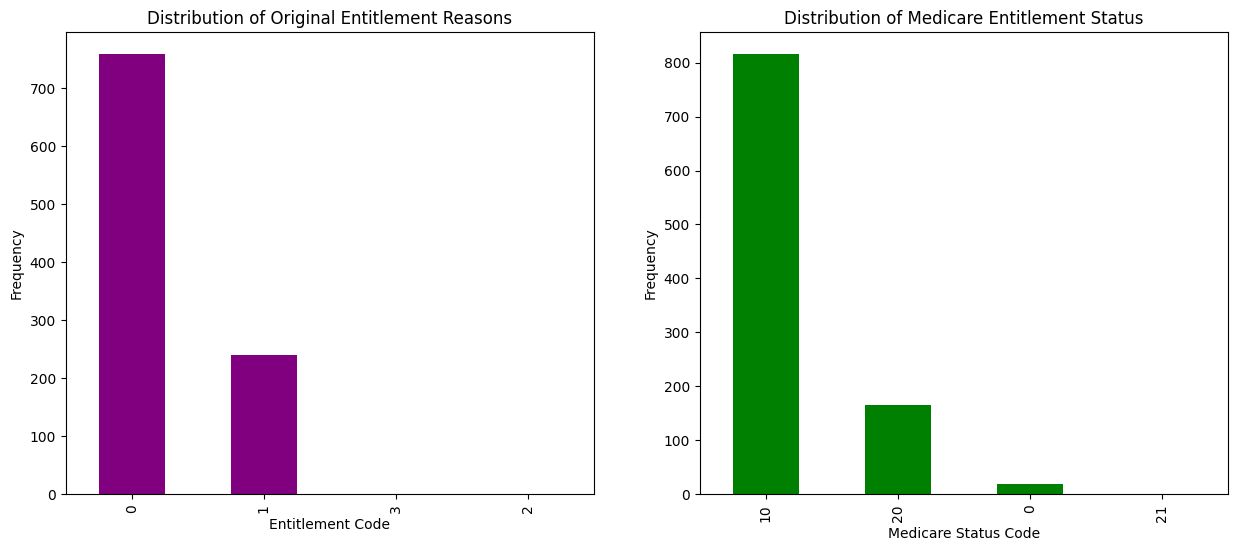

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'eligibility'
# Replace 'eligibility' with the actual name of your DataFrame if different

# Entitlement Analysis for 'original_reason_entitlement_code' and 'medicare_status_code'
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

eligibility3['ORIGINAL_REASON_ENTITLEMENT_CODE'].value_counts().plot(kind='bar', ax=axes[0], color='purple')
axes[0].set_title('Distribution of Original Entitlement Reasons')
axes[0].set_xlabel('Entitlement Code')
axes[0].set_ylabel('Frequency')

eligibility3['MEDICARE_STATUS_CODE'].value_counts().plot(kind='bar', ax=axes[1], color='green')
axes[1].set_title('Distribution of Medicare Entitlement Status')
axes[1].set_xlabel('Medicare Status Code')
axes[1].set_ylabel('Frequency')

plt.show()


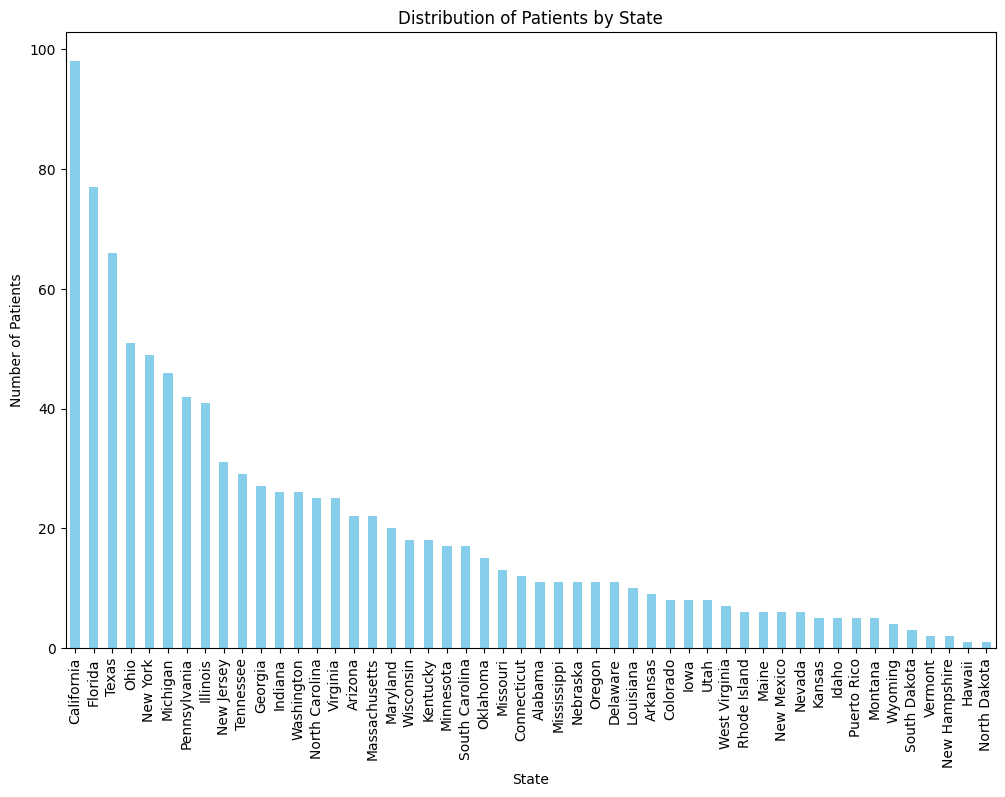

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'eligibility'
# Replace 'eligibility' with the actual name of your DataFrame if different

# Geographical Analysis based on 'STATE'
plt.figure(figsize=(12, 8))
eligibility3['STATE'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Patients by State')
plt.xlabel('State')
plt.ylabel('Number of Patients')
plt.show()


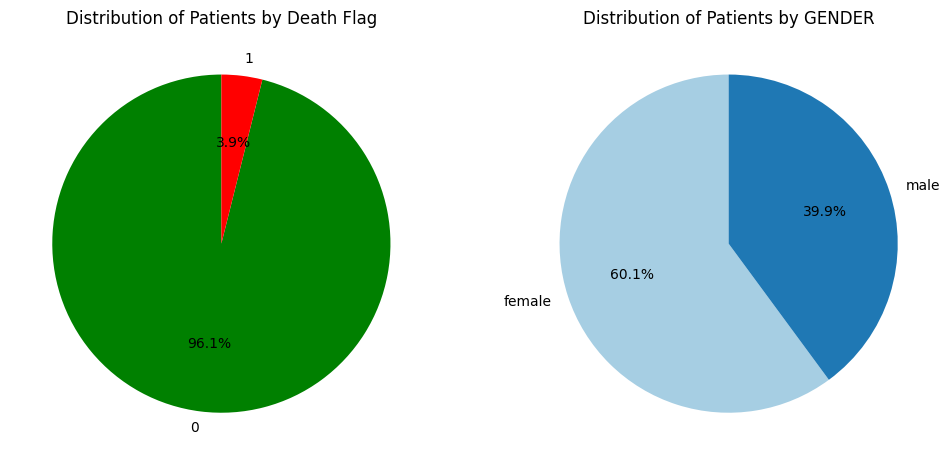

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'eligibility' is your DataFrame
# Replace 'DEATH_FLAG' and 'GENDER' with the actual column names if different
death_flag_counts = eligibility3['DEATH_FLAG'].value_counts()
gender_counts = eligibility3['GENDER'].value_counts()

# Plotting a pie chart for DEATH_FLAG
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.pie(death_flag_counts, labels=death_flag_counts.index, autopct='%1.1f%%', startangle=90, colors=['green', 'red'])
plt.title('Distribution of Patients by Death Flag')

# Plotting a pie chart for GENDER
plt.subplot(1, 2, 2)
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribution of Patients by GENDER')

plt.show()


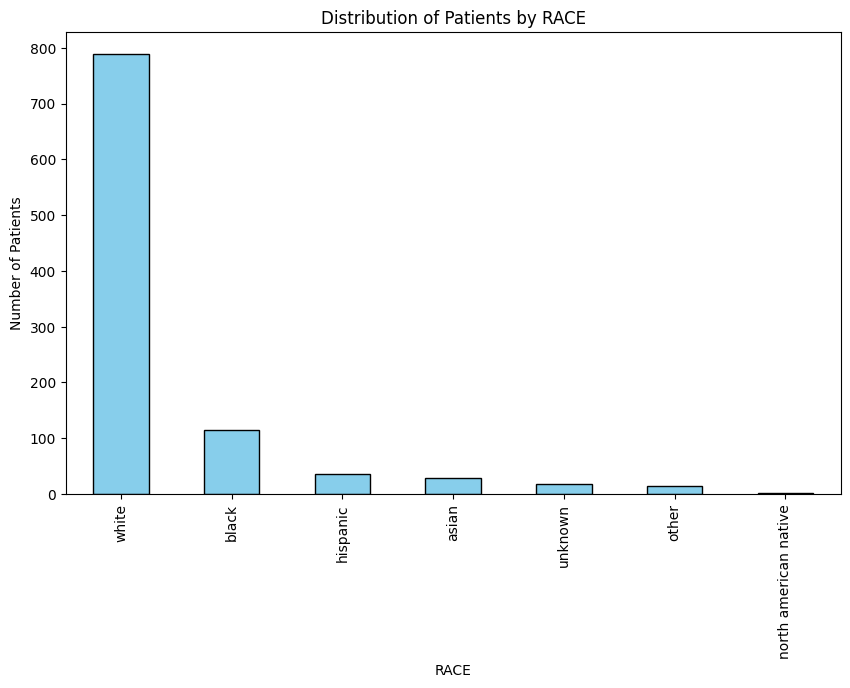

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'eligibility' is your DataFrame
# Replace 'RACE' with the actual column name if different
race_counts = eligibility3['RACE'].value_counts()

# Plotting a bar chart for RACE
plt.figure(figsize=(10, 6))
race_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Patients by RACE')
plt.xlabel('RACE')
plt.ylabel('Number of Patients')
plt.show()


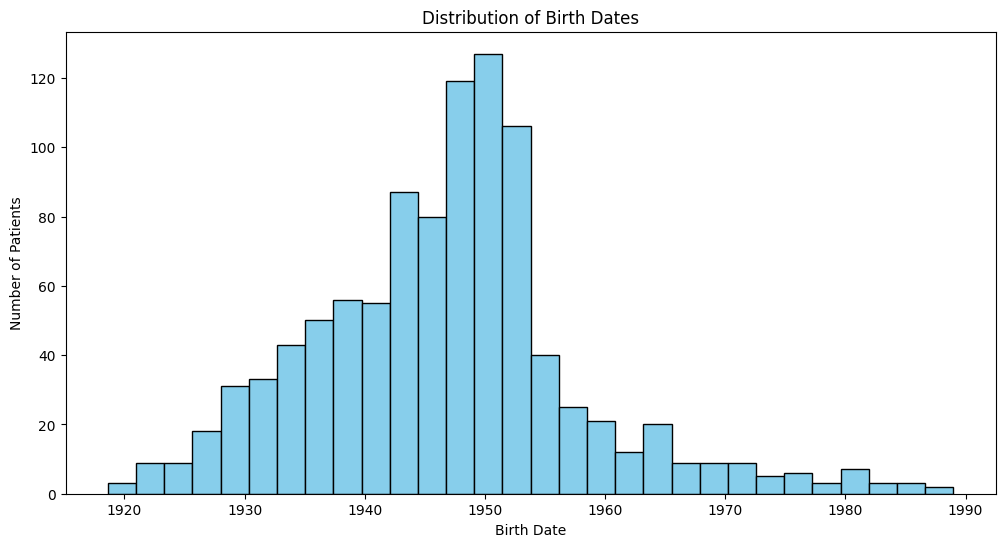

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'eligibility' is your DataFrame
# Replace 'BIRTH_DATE' with the actual column name if different
eligibility3['BIRTH_DATE'] = pd.to_datetime(eligibility3['BIRTH_DATE'])  # Convert to datetime for proper handling

# Plotting a histogram for BIRTH_DATE
plt.figure(figsize=(12, 6))
plt.hist(eligibility3['BIRTH_DATE'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Birth Dates')
plt.xlabel('Birth Date')
plt.ylabel('Number of Patients')
plt.show()
